# Análise exploratória Distrito

Códigos em python 3, usando bibliotes conhecidas para análises exploratórias:
- Numpy para matrizes multidimensionais
- Pandas para manipulação de dados
- Matplotlib e Seaborn para visualização de dados

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing

In [2]:
data = pd.read_csv('C:/Users/Lucas Reis/Desktop/Lucas/DataScience/Distrito/Sample - Distrito Dataminer - Sample.csv') 

### Entendimento dos dados

Onde faremos algumas análises de como funcionam os nossos dados, se são dados de categoria ou não, se estão limpos ou não e então faremos a limpeza de alguns e logo entraremos em algumas análises estatísticas

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,ID,Fonte,Response,CNPJ,Startup,Site,LinkedIn,Setor,Público,Categoria,Subcategoria,Funcionários LKD,Ano de fundação,Cidade,Estado,Funding total,Razão Social,Nome LKD,Tags,País,Modelo de negócio,Descrição,Seguidores LKD,Porte LKD,Faixa # de funcionários,Logo LKD,Foto de capa,Crunchbase,Instagram,Facebook,Twitter,Faturamento Presumido,Probabilidade de funcionamento,Data de abertura,Porte,Segmento CNPJ,Natureza Jurídica,Número de sócios,Estágio da operação,Constituição Legal,E-mail,Telefone,Endereço,Founders
0,526,Sebrae,200,01.119.622/0001-04,DriveOn,http://driveonauto.com,http://linkedin.com/company/driveon-telematica,InsurTech,B2B,"Big Data & Analytics,",NaN,3.0,2017.0,Florianópolis,SC,NaN,DISCOVER TECHNOLOGY INFORMATICA LIMITADA,Driveon Telemática,"Telemática,IoT,Big Data,Deep Learning,Automóve...",BR,SaaS,Driveon é a plataforma perfeita para os servi...,94.0,1 - 10,2 - 10,https://media.licdn.com/dms/image/C560BAQE_Ec-...,https://media.licdn.com/dms/image/C561BAQEbC6E...,https://www.crunchbase.com/organization/driveon,NaN,http://facebook.com/driveontelematica,NaN,De R$10.000.001 a R$25.000.000,ALTA,1996-03-19,Media,SERVICOS,SOCIEDADE EMPRESARIA LIMITADA,2.0,Operando,LTDA,"contato@driveonauto.com,yumi.hamada@discover.c...",NaN,"SC-401, Km 04, s/n - Saco Grande, Florianópoli...","Expedito Fernandes Belmont,Marcio dos Santos P..."
1,372,Report,200,28.167.791/0001-68,Code Money,http://codemoney.com.br,http://linkedin.com/company/code-money,"RetailTech,FinTech",B2B,"Pagamentos,Meios de Pagamento,",Scan & Go | Carteira Digital | Gateway | Antif...,16.0,2017.0,Florianópolis,SC,650,CODE MONEY TECNOLOGIA LTDA,Code Money,Finanças,BR,Marketplace,Soluções financeiras de pagamento e recebiment...,263.0,1 - 10,11 - 50,https://media.licdn.com/dms/image/C560BAQETPhD...,https://media.licdn.com/dms/image/C561BAQHYpEO...,https://www.crunchbase.com/organization/code-m...,http://instagram.com/code.money,http://facebook.com/use,NaN,De R$1.800.001 a R$3.600.000,MÉDIA,2017-07-12,Pequena,SERVICOS,SOCIEDADE EMPRESARIA LIMITADA,2.0,Operação,LTDA,"quero@codemoney.com.br.,hello@codemoney.com.br...",NaN,"Rod. José Carlos Daux, João Paulo, nº 1953, Fl...","Júnior Beltrão,Maikew Medeiro,Thuran Crespi,Sa..."
2,538,Report,200,22.102.480/0001-34,E-moving,http://e-moving.com.br,http://linkedin.com/company/e-moving-mobilidad...,Água e Energia,B2B2C,Mobilidade Elétrica,NaN,25.0,2015.0,São Paulo,SP,NaN,"E-MOVING MOBILIDADE URBANA, INDUSTRIA E COMERC...",E-Moving | Mobilidade Sustentável,"Mobilidade Urbana,Transportes,Saúde e bem-esta...",BR,Marketplace,A E-Moving tem como missão revolucionar a form...,1640.0,1 - 10,11 - 50,https://media.licdn.com/dms/image/C4D0BAQEX7q_...,https://media.licdn.com/dms/image/C4E1BAQGpNqW...,NaN,http://instagram.com/emoving,http://facebook.com/emovingbr,NaN,De R$260.001 a R$360.000,ALTA,2015-03-23,Micro,INDUSTRIA,SOCIEDADE EMPRESARIA LIMITADA,2.0,Escalando/Crescendo,LTDA,"ola@e-moving.com.br,contato@e-moving.com.br,ga...",NaN,"Rua Santa Justina 569, São Paulo","Gabriel Arcon,Kleber Piedade"
3,1100,Report,200,22.598.618/0001-38,Mont Capital,http://montcapital.com.br,http://linkedin.com/company/mont-capital-gesta...,FinTech,B2C,Investimentos,Ativos Financeiros,10.0,2015.0,São Paulo,SP,NaN,MONT CAPITAL GESTAO E ADMINISTRACAO DE RECURSO...,Mont Capital Asset,"Investimentos,Gestão de Recursos,serviços fina...",BR,NaN,A Mont Capital Asset é uma plataforma multi fa...,514.0,11 - 50,11 - 50,https://media.licdn.com/dms/image/C4E0BAQGqQ9C...,https://media.licdn.com/dms/image/C4D1BAQFl8MM...,http://crunchbase.com/organization/comprovei#/...,http://instagram.com/montcapital,http://facebook.com/montcapital,http://twitter.com/montcapital,De R$1.800.001 a R$3.600.000,MÉDIA,2015-06-08,Pequena,SERVICOS,SOCIEDADE EMPRESARIA LIMITADA,2.0,Operando,LTDA,contabil@davidferrari.com.br,NaN,"Avenida Paulista 1636, São Paulo","Jose Mauro Ferraz Andrade,Anderson Ferreira da..."
4,1237,Report,200,26.246.053/0001-80,Orienteme,http://orienteme.com.br,http://linkedi

Dados importados com sucesso

Temos 44 variáveis, sendo que algumas se repetem por fonte de dados diferentes, ex: 'Porte LKD' e 'Faixa # de funcionários'

In [4]:
print(data.columns)
print(data.shape)

Index(['ID', 'Fonte', 'Response', 'CNPJ', 'Startup', 'Site', 'LinkedIn',
       'Setor', 'Público', 'Categoria', 'Subcategoria', 'Funcionários LKD',
       'Ano de fundação', 'Cidade', 'Estado', 'Funding total', 'Razão Social',
       'Nome LKD', 'Tags', 'País', 'Modelo de negócio', 'Descrição',
       'Seguidores LKD', 'Porte LKD', 'Faixa # de funcionários', 'Logo LKD',
       'Foto de capa', 'Crunchbase', 'Instagram', 'Facebook', 'Twitter',
       'Faturamento Presumido', 'Probabilidade de funcionamento',
       'Data de abertura', 'Porte', 'Segmento CNPJ', 'Natureza Jurídica',
       'Número de sócios', 'Estágio da operação', 'Constituição Legal',
       'E-mail', 'Telefone', 'Endereço', 'Founders'],
      dtype='object')
(1000, 44)


#### Informações sobre o tipo e o número de dados que temos por coluna

Vemos alguns dados faltando nas colunas, trataremos isso mais tarde 

In [17]:
data['Funding total'] = data['Funding total'].str.replace(",","").astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
ID                                1000 non-null int64
Fonte                             1000 non-null object
Response                          1000 non-null object
CNPJ                              994 non-null object
Startup                           1000 non-null object
Site                              1000 non-null object
LinkedIn                          999 non-null object
Setor                             1000 non-null object
Público                           954 non-null object
Categoria                         948 non-null object
Subcategoria                      810 non-null object
Funcionários LKD                  997 non-null float64
Ano de fundação                   999 non-null float64
Cidade                            993 non-null object
Estado                            996 non-null object
Funding total                     281 non-null float64
Razão Social          

Vemos que 75% das nossas empresas tem até 33 funcionários, mas temos empresas que tem até 3.329 funcionários, também a explicação do nosso desvio padrão estar tão grande e nossa média ser maior que 75% das nossas empresas

In [18]:
data.describe()

,ID,Funcionários LKD,Ano de fundação,Funding total,Seguidores LKD,Número de sócios
count,1000.000000,997.000000,999.000000,2.810000e+02,9.980000e+02,983.000000
mean,2030.671000,48.042126,2013.201201,9.045996e+06,2.568811e+04,2.824008
std,2621.249035,176.345983,4.698586,5.360084e+07,6.594230e+05,1.865802
min,5.000000,1.000000,1980.000000,0.000000e+00,1.000000e+00,0.000000
25%,618.750000,5.000000,2012.000000,0.000000e+00,8.325000e+01,2.000000
50%,1258.500000,13.000000,2015.000000,1.750000e+05,3.020000e+02,2.000000
75%,1964.250000,33.000000,2016.000000,1.491952e+06,1.157500e+03,4.000000
max,12061.000000,3329.000000,2019.000000,7.283000e+08,2.078408e+07,16.000000


#### Mais entendimentos sobres os dados

Quais são as empresas com o maior número de funcionários de acordo com o LinkedIn?

In [7]:
data.loc[data['Funcionários LKD'] > 1000]

,ID,Fonte,Response,CNPJ,Startup,Site,LinkedIn,Setor,Público,Categoria,Subcategoria,Funcionários LKD,Ano de fundação,Cidade,Estado,Funding total,Razão Social,Nome LKD,Tags,País,Modelo de negócio,Descrição,Seguidores LKD,Porte LKD,Faixa # de funcionários,Logo LKD,Foto de capa,Crunchbase,Instagram,Facebook,Twitter,Faturamento Presumido,Probabilidade de funcionamento,Data de abertura,Porte,Segmento CNPJ,Natureza Jurídica,Número de sócios,Estágio da operação,Constituição Legal,E-mail,Telefone,Endereço,Founders
137,1607,Report,200,16.501.555/0001-57,Stone,http://stone.com.br,http://linkedin.com/company/stone-pagamentos,FinTech,B2B,Meios de Pagamento,PdV,3329.0,2012.0,São Paulo,SP,NaN,STONE PAGAMENTOS S.A.,Stone Pagamentos,"Tecnologia,Pagamentos,Finanças",BR,Outros,Muito mais que uma maquininha no balcão.\n\nNó...,24.0,1001 - 5000,1001 - 5000,https://media.licdn.com/dms/image/C4E0BAQH4L-U...,https://media.licdn.com/dms/image/C4E1BAQF29Qf...,https://www.crunchbase.com/organization/stone-...,http://instagram.com/stonepagamentos,http://facebook.com/stonepagamentos,http://twitter.com/stonepagamentos,Acima de R$100.000.000,ALTA,2012-06-22,Grande,SERVICOS,SOCIEDADE ANONIMA FECHADA,7.0,Operando,NaN,sbolfer@arpexcapital.com.br,NaN,"Rua Fidêncio Ramos, 308 - Vila Olímpia - 10º A...",NaN
219,1176,Report,200,18.236.120/0001-58,Nubank,http://nubank.com.br,http://linkedin.com/company/nubank-brasil,FinTech,B2C,Serviços Digitais,Bancos Digitais,1524.0,2013.0,São Paulo,SP,"728,300,000",NU PAGAMENTOS S.A.,Nubank,"Payments,Lending and Investments,Finanças,Fina...",BR,NaN,Nubank is the leading fintech in Latin America...,1023217.0,1001 - 5000,1001 - 5000,https://media.licdn.com/dms/image/C4D0BAQFgkED...,https://media.licdn.com/dms/image/C4E1BAQFS6nw...,https://www.crunchbase.com/organization/nubank,http://instagram.com/nubank,http://facebook.com/nubankbrasil,http://twitter.com/nubank,Acima de R$100.000.000,ALTA,2013-06-04,Grande,SERVICOS,SOCIEDADE ANONIMA FECHADA,9.0,Operando,NaN,"nucommunity@x.jpg,nucommunity@1x.jpg,meajuda@n...",NaN,"Rua Capote Valente, São Paulo, São Paulo","Cristina Junqueira, David Velez, Edward Wible"
325,1263,Report,200,08.561.701/0001-01,PagSeguro,http://pagseguro.uol.com.br,http://linkedin.com/company/pagseguro-uol,FinTech,B2B,Meios de Pagamento,PdV,1636.0,2006.0,São Paulo,SP,NaN,PAGSEGURO INTERNET S.A.,PagSeguro UOL,"Commerce and Shopping,Financial Services,Inter...",BR,NaN,O PagSeguro promove soluções inovadoras em ser...,927370.0,501 - 1000,501 - 1000,https://media.licdn.com/dms/image/C4E0BAQFV8aI...,https://media.licdn.com/dms/image/C4D1BAQHo_D1...,https://www.crunchbase.com/organization/pagseguro,http://instagram.com/pagseguro,http://facebook.com/pagseguro,NaN,Acima de R$100.000.000,ALTA,2006-12-20,Grande,SERVICOS,SOCIEDADE ANONIMA FECHADA,4.0,NaN,NaN,faleconosco@uol.com.br,NaN,"Avenida Brigadeiro Faria Lima, nº 1384, , São ...",NaN
352,2042,DV- AdTech,200,08.654.191/0001-17,Movile,http://movile.com,http://linkedin.com/company/391532,AdTech,"B2B,B2C",Content & Experience,E-mail & SMS Marketing,2938.0,1998.0,Campinas,SP,"355,000,000",MOVILE INTERNET MOVEL S.A.,Movile,"Mobile,Web,Apple,Android,Aplicativos,E-commerce",BR,Outros,A Movile é líder global em mobile marketplaces...,87988.0,1001 - 5000,1001 - 5000,https://media.licdn.com/dms/image/C510BAQFq2nq...,https://media.licdn.com/dms/image/C4E1BAQEx1Gr...,NaN,NaN,http://facebook.com/movile,NaN,Acima de R$100.000.000,ALTA,2007-02-12,Grande,SERVICOS,SOCIEDADE ANONIMA FECHADA,6.0,Operando,NaN,"compras1@movile.com,financeiro@movile.com",NaN,"Av. Coronel Silva Teles, 977 5º andar, Cambuí...",NaN


Fontes de dados:

In [61]:
data['Fonte'].unique()

array(['Sebrae', 'Report', 'Report Antigo', 'Base Compilada', '.',
       'Crunchbase', 'Cadastro-Dataminer', 'Liga Ventures', 'StartupBase',
       'Report Retailtech', 'Abstartups', 'Cadastro Dataminer',
       'Report AgTech', 'Extra', 'Disruptbox', 'Cadastro DM',
       'DV- AdTech', 'Portfólio Aceleradoras/Investidoras',
       'Report Healthtech', 'Report Enel,Report Indústria 4.0', 'DV',
       'Report Fintech', 'LinkedIn', 'Report Indústria 4.0',
       'DV- HealthTech', 'Distrito', 'Base Distrito', 'Report Enel'],
      dtype=object)

## Categoria de empresas que mais aparecem no nosso dataset

Podemos  ver que temos dados com ',' na frente e no final de frases, faremos a limpeza para vermos as mudanças, pois empresas de Advertising & Promotion tem na soma maior o que deveria colocar ela em primeiro lugar no rank de quantidade.

In [10]:
data['Categoria'] = data['Categoria'].str.replace(",","").astype(object)
data['Categoria'].value_counts()

Advertising & Promotion                                                                                62
Meios de Pagamento                                                                                     60
Crédito                                                                                                55
Content & Experience                                                                                   46
Social & Relationships                                                                                 44
Backoffice                                                                                             38
Commerce & Sales                                                                                       35
Gestão e PEP                                                                                           30
Criptomoedas                                                                                           23
Risco e Compliance                            

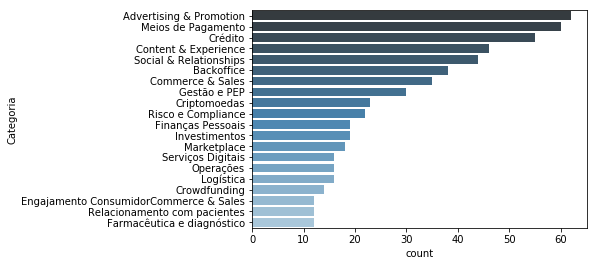

In [11]:
ax = sns.countplot(y='Categoria', data=data, order = data['Categoria'].value_counts()[:20].index, palette = 'Blues_d')

Poderiamos separar as categorias de empresas que tem mais de uma categoria, mas para isso duplicaremos nossos dados.

#### Setores com maior número de empresas

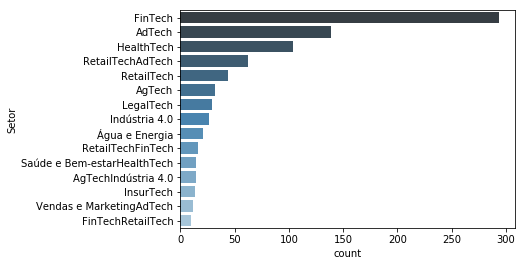

In [12]:
data['Setor'] = data['Setor'].str.replace(",","").astype(object)
data['Setor'].value_counts()
ax = sns.countplot(y='Setor', data=data, order = data['Setor'].value_counts()[:15].index, palette = 'Blues_d') 

#### Total financiado em FinTech
 
Veremos a relação de funding com os dois setores que mais aparecem em nosso dataset.

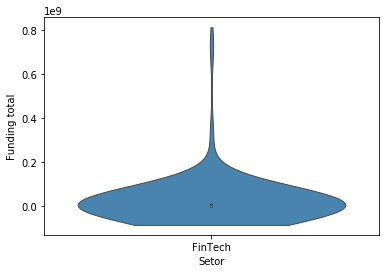

In [67]:
sns.violinplot(x=data['Setor'][data['Setor'] == 'FinTech'], y="Funding total", data=data, palette = 'Blues_d', bw=1, cut=1, linewidth=1);

#### Total financiado em AdTech

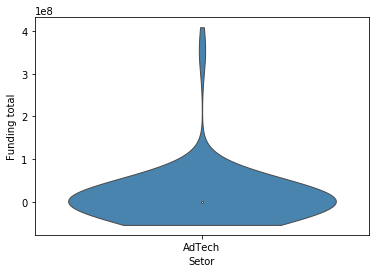

In [69]:
sns.violinplot(x=data['Setor'][data['Setor'] == 'AdTech'], y="Funding total", data=data, palette = 'Blues_d', bw=1, cut=1, linewidth=1);

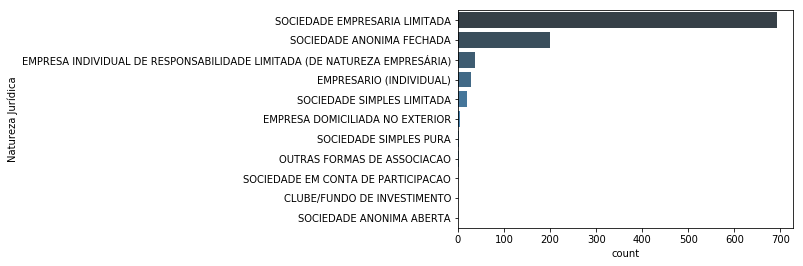

In [71]:
ax = sns.countplot(y='Natureza Jurídica', data=data, order = data['Natureza Jurídica'].value_counts().index, palette = 'Blues_d')

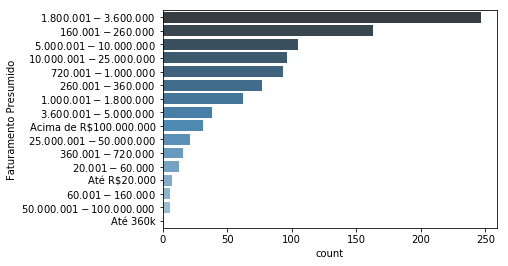

In [23]:
# Foram feitas limpezas para melhor leitura
data['Faturamento Presumido'] = data['Faturamento Presumido'].str.replace("De R","")
data['Faturamento Presumido'] = data['Faturamento Presumido'].str.replace("a R","-")
ax = sns.countplot(y='Faturamento Presumido', data=data, order = data['Faturamento Presumido'].value_counts().index, palette = 'Blues_d')

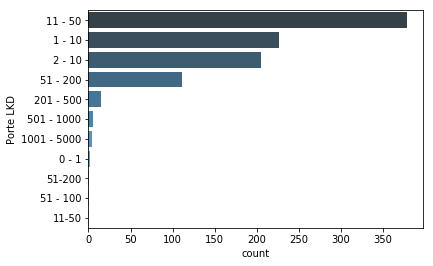

In [73]:
ax = sns.countplot(y='Porte LKD', data=data, order = data['Porte LKD'].value_counts().index, palette = 'Blues_d')

### Boxplot

Podemos aqui ver aqui que temos poucas empresas fora da média de funcionário/data de abertura, conseguimos perceber duas empresas que chamam mais atenção, uma fundada em 1983/84 com na categoria de apenas 1-10 funcionários e outra de 1980 com 51-200 funcionários

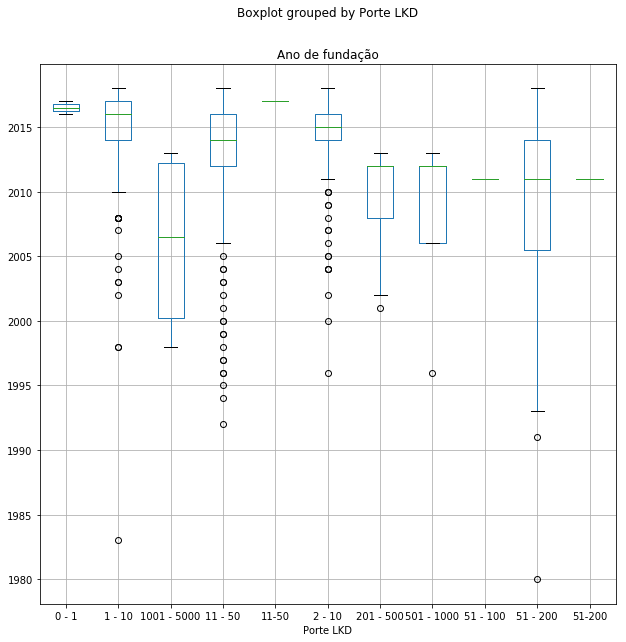

In [25]:
data.boxplot('Ano de fundação','Porte LKD',figsize = (10,10))

Distribuição ano de fundação

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x012E5330>]],
      dtype=object)

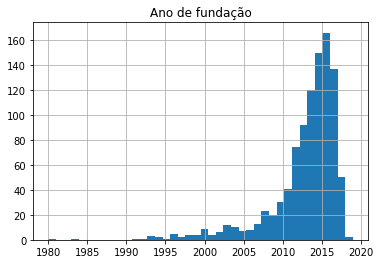

In [26]:
data.hist('Ano de fundação',bins = 40)

## Top 10 investimentos

In [27]:
data.iloc[data['Funding total'].nlargest(10).index]

,ID,Fonte,Response,CNPJ,Startup,Site,LinkedIn,Setor,Público,Categoria,Subcategoria,Funcionários LKD,Ano de fundação,Cidade,Estado,Funding total,Razão Social,Nome LKD,Tags,País,Modelo de negócio,Descrição,Seguidores LKD,Porte LKD,Faixa # de funcionários,Logo LKD,Foto de capa,Crunchbase,Instagram,Facebook,Twitter,Faturamento Presumido,Probabilidade de funcionamento,Data de abertura,Porte,Segmento CNPJ,Natureza Jurídica,Número de sócios,Estágio da operação,Constituição Legal,E-mail,Telefone,Endereço,Founders
219,1176,Report,200,18.236.120/0001-58,Nubank,http://nubank.com.br,http://linkedin.com/company/nubank-brasil,FinTech,B2C,Serviços Digitais,Bancos Digitais,1524.0,2013.0,São Paulo,SP,728300000.0,NU PAGAMENTOS S.A.,Nubank,"Payments,Lending and Investments,Finanças,Fina...",BR,NaN,Nubank is the leading fintech in Latin America...,1023217.0,1001 - 5000,1001 - 5000,https://media.licdn.com/dms/image/C4D0BAQFgkED...,https://media.licdn.com/dms/image/C4E1BAQFS6nw...,https://www.crunchbase.com/organization/nubank,http://instagram.com/nubank,http://facebook.com/nubankbrasil,http://twitter.com/nubank,Acima de R$100.000.000,ALTA,2013-06-04,Grande,SERVICOS,SOCIEDADE ANONIMA FECHADA,9.0,Operando,NaN,"nucommunity@x.jpg,nucommunity@1x.jpg,meajuda@n...",NaN,"Rua Capote Valente, São Paulo, São Paulo","Cristina Junqueira, David Velez, Edward Wible"
352,2042,DV- AdTech,200,08.654.191/0001-17,Movile,http://movile.com,http://linkedin.com/company/391532,AdTech,"B2B,B2C",Content & Experience,E-mail & SMS Marketing,2938.0,1998.0,Campinas,SP,355000000.0,MOVILE INTERNET MOVEL S.A.,Movile,"Mobile,Web,Apple,Android,Aplicativos,E-commerce",BR,Outros,A Movile é líder global em mobile marketplaces...,87988.0,1001 - 5000,1001 - 5000,https://media.licdn.com/dms/image/C510BAQFq2nq...,https://media.licdn.com/dms/image/C4E1BAQEx1Gr...,NaN,NaN,http://facebook.com/movile,NaN,Acima de R$100.000.000,ALTA,2007-02-12,Grande,SERVICOS,SOCIEDADE ANONIMA FECHADA,6.0,Operando,NaN,"compras1@movile.com,financeiro@movile.com",NaN,"Av. Coronel Silva Teles, 977 5º andar, Cambuí...",NaN
106,435,Report,200,17.770.708/0001-24,Creditas,http://creditas.com.br,http://linkedin.com/company/creditasbr,FinTech,B2C,Crédito,Oferta Direta,692.0,2012.0,São Paulo,SP,318950000.0,CREDITAS SOLUCOES FINANCEIRAS LTDA.,Creditas,"Empréstimo com Garantia,Tecnologia,Negócio de ...",BR,NaN,Creditas is a digital lending platform focused...,173.0,501 - 1000,501 - 1000,https://media.licdn.com/dms/image/C4D0BAQEaByZ...,https://media.licdn.com/dms/image/C4D1BAQEP-Za...,https://www.crunchbase.com/organization/creditas,NaN,http://facebook.com/creditasbr,http://twitter.com/creditasbr,Acima de R$100.000.000,ALTA,2013-01-24,Grande,SERVICOS,SOCIEDADE EMPRESARIA LIMITADA,9.0,NaN,NaN,"meajuda@creditas.com.br,sergio@bankfacil.com.br",NaN,"Avenida Engenheiro Luis Carlos Berrini, 105, S...",Sergio Furio
928,1806,Report,200,28.387.822/0001-96,Yellow,http://yellow.app,http://linkedin.com/company/yellow-us,Água e Energia,NaN,Mobilidade Elétrica,NaN,188.0,2018.0,São Paulo,SP,150600000.0,YELLOW SOLUCOES DE MOBILIDADE LTDA.,Yellow,"bikesharing,bikesharing2.0,tech,startup,urbanm...",BR,NaN,This is Yellow :)\n\nA micromobility and payme...,23378.0,51 - 200,51 - 200,https://media.licdn.com/dms/image/C4D0BAQEM__C...,https://media.licdn.com/dms/image/C4D1BAQEZ0TY...,NaN,http://instagram.com/yellow.us,http://facebook.com/yellow,http://twitter.com/yellow_app,$1.800.001 -$3.600.000,ALTA,2017-08-10,Pequena,SERVICOS,SOCIEDADE EMPRESARIA LIMITADA,3.0,NaN,NaN,eduardo@casamusa.com.br,NaN,"Rua Lourenço Marques 297, São Paulo",NaN
83,984,Report,200,18.277.493/0001-77,Loggi,http://loggi.com,http://linkedin.com/company/loggi,RetailTechSupply Chain,B2B,Logística,"Entrega Smart,",848.0,2013.0,São Paulo,SP,145001000.0,LOGGI TECNOLOGIA LTDA.,Loggi,"Logistics,Technology,Services,Software,Innovat...",BR,Marketplace,"A Loggi está conectando o Brasil, usando tecno...",267.0,501 - 1000,501 - 1000,https://media.licdn.com/dms/image/C4D0BAQEqYk1...,htt

#### Correlação entre variáveis categóricas

Queremos analisar o relacionamento de todos as nossas variáveis, por isso, transformaremos as nossas variáveis categóricas em números usando um encoder.

In [32]:
data['Porte LKD'].value_counts()

11 - 50        379
1 - 10         227
2 - 10         205
51 - 200       111
201 - 500       15
501 - 1000       5
1001 - 5000      4
0 - 1            2
51-200           1
51 - 100         1
11-50            1
Name: Porte LKD, dtype: int64

In [58]:
le = preprocessing.LabelEncoder()
data_label = data
data_label = data_label.dropna(subset=['Setor','Porte LKD', 'Categoria','Estado'
                                       , 'Faixa # de funcionários', 'Natureza Jurídica', 'Faturamento Presumido'])
data_label['Setor_label']                   = le.fit_transform(data_label['Setor'])
data_label['Porte LKD_label']               = le.fit_transform(data_label['Porte LKD'])
data_label['Categoria_label']               = le.fit_transform(data_label['Categoria'])
data_label['Estado_label']                  = le.fit_transform(data_label['Estado'])
data_label['Faixa_funcionários_label']      = le.fit_transform(data_label['Faixa # de funcionários'])
data_label['Natureza Jurídica_label']       = le.fit_transform(data_label['Natureza Jurídica'])
data_label['Faturamento_presumido_label']   = le.fit_transform(data_label['Faturamento Presumido'])


c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

In [56]:
data_label.head()

,ID,Fonte,Response,CNPJ,Startup,Site,LinkedIn,Setor,Público,Categoria,Subcategoria,Funcionários LKD,Ano de fundação,Cidade,Estado,Funding total,Razão Social,Nome LKD,Tags,País,Modelo de negócio,Descrição,Seguidores LKD,Porte LKD,Faixa # de funcionários,Logo LKD,Foto de capa,Crunchbase,Instagram,Facebook,Twitter,Faturamento Presumido,Probabilidade de funcionamento,Data de abertura,Porte,Segmento CNPJ,Natureza Jurídica,Número de sócios,Estágio da operação,Constituição Legal,E-mail,Telefone,Endereço,Founders,Setor_label,Porte LKD_label,Categoria_label,Estado_label,Faixa_funcionários_label,Natureza Jurídica_label
0,526,Sebrae,200,01.119.622/0001-04,DriveOn,http://driveonauto.com,http://linkedin.com/company/driveon-telematica,InsurTech,B2B,Big Data & Analytics,NaN,3.0,2017.0,Florianópolis,SC,NaN,DISCOVER TECHNOLOGY INFORMATICA LIMITADA,Driveon Telemática,"Telemática,IoT,Big Data,Deep Learning,Automóve...",BR,SaaS,Driveon é a plataforma perfeita para os servi...,94.0,1 - 10,2 - 10,https://media.licdn.com/dms/image/C560BAQE_Ec-...,https://media.licdn.com/dms/image/C561BAQEbC6E...,https://www.crunchbase.com/organization/driveon,NaN,http://facebook.com/driveontelematica,NaN,$10.000.001 -$25.000.000,ALTA,1996-03-19,Media,SERVICOS,SOCIEDADE EMPRESARIA LIMITADA,2.0,Operando,LTDA,"contato@driveonauto.com,yumi.hamada@discover.c...",NaN,"SC-401, Km 04, s/n - Saco Grande, Florianópoli...","Expedito Fernandes Belmont,Marcio dos Santos P...",50,1,22,23,6,8
1,372,Report,200,28.167.791/0001-68,Code Money,http://codemoney.com.br,http://linkedin.com/company/code-money,RetailTechFinTech,B2B,PagamentosMeios de Pagamento,Scan & Go | Carteira Digital | Gateway | Antif...,16.0,2017.0,Florianópolis,SC,650.0,CODE MONEY TECNOLOGIA LTDA,Code Money,Finanças,BR,Marketplace,Soluções financeiras de pagamento e recebiment...,263.0,1 - 10,11 - 50,https://media.licdn.com/dms/image/C560BAQETPhD...,https://media.licdn.com/dms/image/C561BAQHYpEO...,https://www.crunchbase.com/organization/code-m...,http://instagram.com/code.money,http://facebook.com/use,NaN,$1.800.001 -$3.600.000,MÉDIA,2017-07-12,Pequena,SERVICOS,SOCIEDADE EMPRESARIA LIMITADA,2.0,Operação,LTDA,"quero@codemoney.com.br.,hello@codemoney.com.br...",NaN,"Rod. José Carlos Daux, João Paulo, nº 1953, Fl...","Júnior Beltrão,Maikew Medeiro,Thuran Crespi,Sa...",59,1,116,23,4,8
2,538,Report,200,22.102.480/0001-34,E-moving,http://e-moving.com.br,http://linkedin.com/company/e-moving-mobilidad...,Água e Energia,B2B2C,Mobilidade Elétrica,NaN,25.0,2015.0,São Paulo,SP,NaN,"E-MOVING MOBILIDADE URBANA, INDUSTRIA E COMERC...",E-Moving | Mobilidade Sustentável,"Mobilidade Urbana,Transportes,Saúde e bem-esta...",BR,Marketplace,A E-Moving tem como missão revolucionar a form...,1640.0,1 - 10,11 - 50,https://media.licdn.com/dms/image/C4D0BAQEX7q_...,https://media.licdn.com/dms/image/C4E1BAQGpNqW...,NaN,http://instagram.com/emoving,http://facebook.com/emovingbr,NaN,$260.001 -$360.000,ALTA,2015-03-23,Micro,INDUSTRIA,SOCIEDADE EMPRESARIA LIMITADA,2.0,Escalando/Crescendo,LTDA,"ola@e-moving.com.br,contato@e-moving.com.br,ga...",NaN,"Rua Santa Justina 569, São Paulo","Gabriel Arcon,Kleber Piedade",76,1,102,25,4,8
3,1100,Report,200,22.598.618/0001-38,Mont Capital,http://montcapital.com.br,http://linkedin.com/company/mont-capital-gesta...,FinTech,B2C,Investimentos,Ativos Financeiros,10.0,2015.0,São Paulo,SP,NaN,MONT CAPITAL GESTAO E ADMINISTRACAO DE RECURSO...,Mont Capital Asset,"Investimentos,Gestão de Recursos,serviços fina...",BR,NaN,A Mont Capital Asset é uma plataforma multi fa...,514.0,11 - 50,11 - 50,https://media.licdn.com/dms/image/C4E0BAQGqQ9C...,https://media.licdn.com/dms/image/C4D1BAQFl8MM...,http://crunchbase.com/organization/comprovei#/...,http://instagram.com/montcapital,http://facebook.com/montcapital,http://twitter.com/montcapital,$1.800.001 -$3.600.000,MÉDIA,2015-06-08,Pequena,SERVICOS,SOCIEDADE EMPRESARIA LIMITADA,2.0,Operando,LTDA,contabil@davidferrari.com.br,NaN,"Avenida Paulista 1636, São Paulo","Jose Mauro Ferr

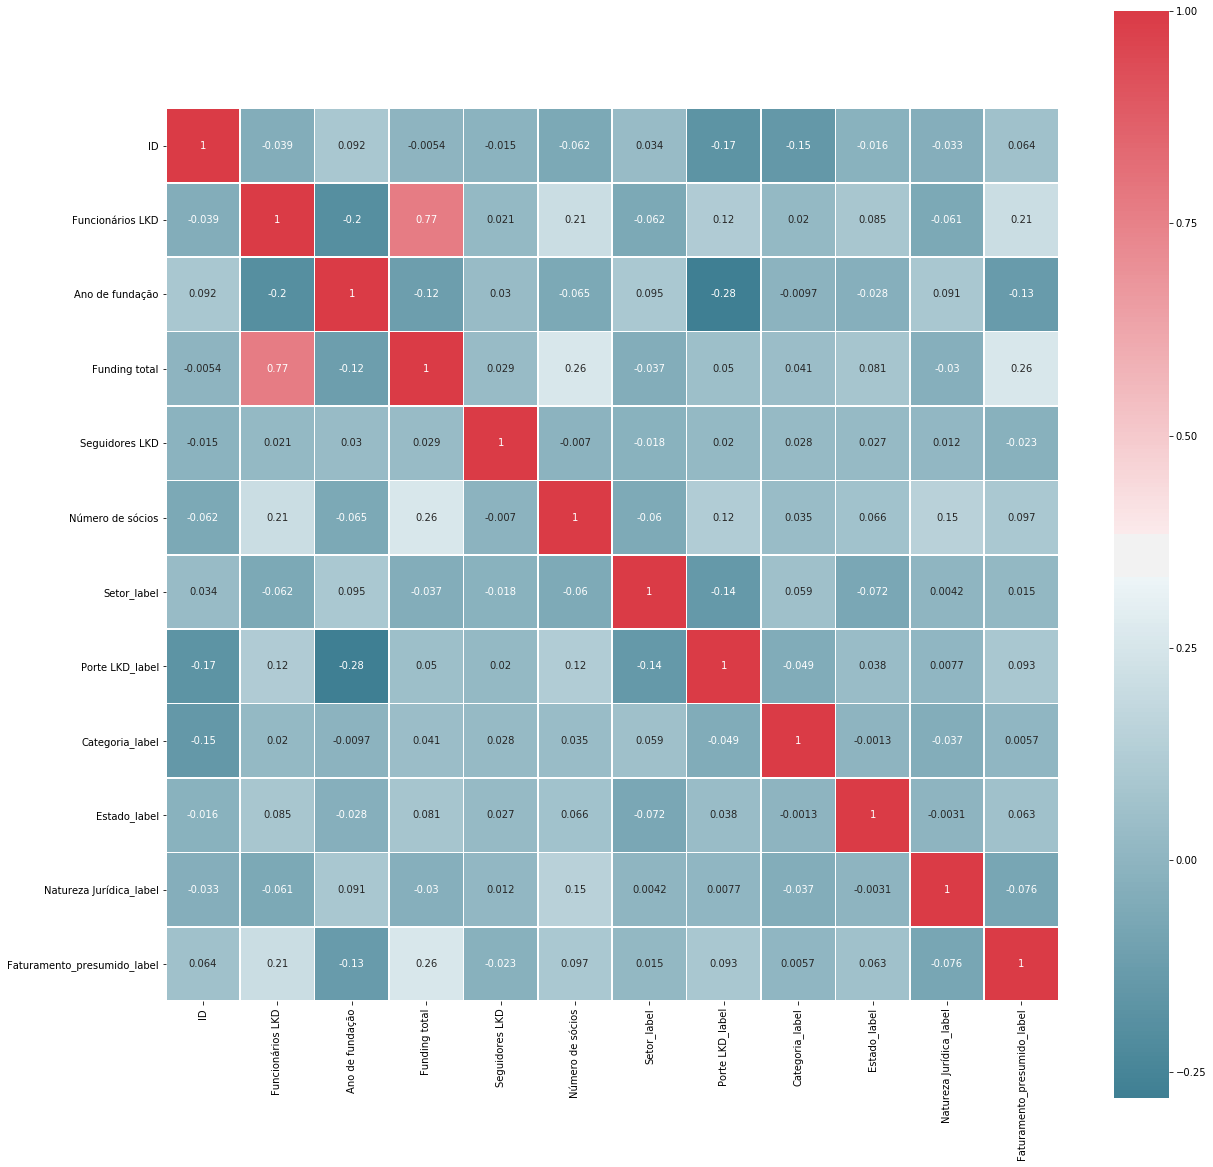

In [59]:
data_label = data_label.drop(columns=['Faixa_funcionários_label'])
corr = data_label.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True, linewidths=.5
            , cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [75]:
data.loc[data['CNPJ'] == '16.501.555/0001-57']

,ID,Fonte,Response,CNPJ,Startup,Site,LinkedIn,Setor,Público,Categoria,Subcategoria,Funcionários LKD,Ano de fundação,Cidade,Estado,Funding total,Razão Social,Nome LKD,Tags,País,Modelo de negócio,Descrição,Seguidores LKD,Porte LKD,Faixa # de funcionários,Logo LKD,Foto de capa,Crunchbase,Instagram,Facebook,Twitter,Faturamento Presumido,Probabilidade de funcionamento,Data de abertura,Porte,Segmento CNPJ,Natureza Jurídica,Número de sócios,Estágio da operação,Constituição Legal,E-mail,Telefone,Endereço,Founders,Setor_label
126,1254,Report,200,16.501.555/0001-57,Pagar.me,http://pagar.me,http://linkedin.com/company/pagar-me,RetailTechFinTech,B2B,PagamentosMeios de Pagamento,Scan & Go | Carteira Digital | Gateway | Antif...,133.0,2013.0,São Paulo,SP,0.0,STONE PAGAMENTOS S.A.,Pagar.me,"Pagamentos na Internet,Payments on Internet,Ma...",BR,NaN,Pagar.me é uma empresa brasileira de pagamento...,9058.0,201 - 500,201 - 500,https://media.licdn.com/dms/image/C4D0BAQH1Um-...,https://media.licdn.com/dms/image/C4D1BAQGulMA...,https://www.crunchbase.com/organization/pagar-me,NaN,http://facebook.com/pagar.me,http://twitter.com/pagar_me,Acima de R$100.000.000,ALTA,2012-06-22,Grande,SERVICOS,SOCIEDADE ANONIMA FECHADA,7.0,Operando,NaN,sbolfer@arpexcapital.com.br,NaN,"Rua Fidêncio Ramos, 308, 10º andar - Vila Olím...","Henrique Dubugras, Pedro Franceschi",77
137,1607,Report,200,16.501.555/0001-57,Stone,http://stone.com.br,http://linkedin.com/company/stone-pagamentos,FinTech,B2B,Meios de Pagamento,PdV,3329.0,2012.0,São Paulo,SP,NaN,STONE PAGAMENTOS S.A.,Stone Pagamentos,"Tecnologia,Pagamentos,Finanças",BR,Outros,Muito mais que uma maquininha no balcão.\n\nNó...,24.0,1001 - 5000,1001 - 5000,https://media.licdn.com/dms/image/C4E0BAQH4L-U...,https://media.licdn.com/dms/image/C4E1BAQF29Qf...,https://www.crunchbase.com/organization/stone-...,http://instagram.com/stonepagamentos,http://facebook.com/stonepagamentos,http://twitter.com/stonepagamentos,Acima de R$100.000.000,ALTA,2012-06-22,Grande,SERVICOS,SOCIEDADE ANONIMA FECHADA,7.0,Operando,NaN,sbolfer@arpexcapital.com.br,NaN,"Rua Fidêncio Ramos, 308 - Vila Olímpia - 10º A...",NaN,29


# Dados minerados - GlassDoor

In [78]:
gdata = pd.read_csv('C:/Users/Lucas Reis/PycharmProjects/Scrapy2/glass.csv') 
gdata.head()

,empresa,nota,avaliacoes
0,Itaú Unibanco (Itaú BBA e Rede),"4,2","7,7k"
1,IBM,"3,9",50k
2,Banco Bradesco,"3,8","4,3k"
3,Atento,"3,3","3,9k"
4,Santander,"3,7","6,3k"


In [81]:
gdata['avaliacoes'] = gdata['avaliacoes'].str.replace("k","000")
gdata['avaliacoes'] = gdata['avaliacoes'].str.replace(",","")
gdata['avaliacoes'] = gdata['avaliacoes'].astype(float)
gdata['nota'] = gdata['nota'].str.replace(",",".").astype(float)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [85]:
gdata.describe()

,nota,avaliacoes
count,9709.000000,9709.000000
mean,3.448357,1269.519518
std,0.561244,6696.312124
min,1.000000,4.000000
25%,3.100000,6.000000
50%,3.500000,12.000000
75%,3.800000,50.000000
max,5.000000,99000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x208AF9F0>]],
      dtype=object)

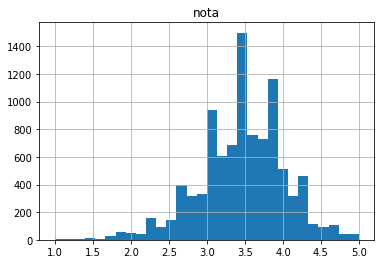

In [97]:
gdata.hist('nota',bins = 30)

In [103]:
gdata.loc[gdata['avaliacoes'] > 70000]

,empresa,nota,avaliacoes
0,Itaú Unibanco (Itaú BBA e Rede),4.2,77000.0
6,Teleperformance,3.3,79000.0
45,Siemens,4.0,85000.0
60,Procter & Gamble,4.0,75000.0
68,PepsiCo,3.6,89000.0
86,Ericsson-Worldwide,3.8,99000.0
143,Thomson Reuters,3.7,89000.0
166,ADP,3.7,89000.0
180,Hewlett Packard Enterprise | HPE,3.7,99000.0
186,Uber,4.3,81000.0


Relação entre notas e número de avaliações

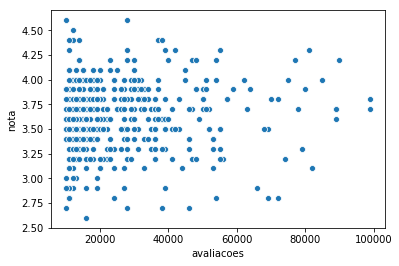

In [143]:
scatterdata = gdata.loc[gdata['avaliacoes'] > 1000]
sns.scatterplot(x='avaliacoes', y='nota',data = scatterdata)